# Project 1 : diabetes 


# 0. 모듈 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 불러오기 및 준비

In [2]:
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes()
df_x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = diabetes.target
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


# 2, 3 x,y 값 array

In [3]:
X=np.array(df_x)
y=np.array(df_y)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


# 4.  train 데이터와 test 데이터로 분리하기   
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# 5. 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

In [5]:
# number of feautre = 10 =W
# 임의의 초기값 W ,b 설정
W = np.random.rand(10) 
b = np.random.rand()

In [6]:
W

array([0.54993637, 0.82310779, 0.55551643, 0.03650159, 0.42762803,
       0.43968359, 0.07772949, 0.14810487, 0.82122943, 0.1060629 ])

In [7]:
b

0.9237378021926701

- 모델 함수 구현

In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 6. 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [10]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# 7.  기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [11]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [12]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.57774947  -13.69924342 -189.60578354 -142.70571101  -68.31414348
  -56.03938475  127.62585284 -139.01879073 -182.86254918 -123.57203275]
db: -302.4194927214066


# 8. 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요   
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [13]:
LEARNING_RATE = 0.001

# 9. 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.   
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.   
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요. 

In [14]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 27848.4249
Iteration 20 : Loss 26947.5036
Iteration 30 : Loss 26081.4115
Iteration 40 : Loss 25248.7846
Iteration 50 : Loss 24448.3121
Iteration 60 : Loss 23678.7350
Iteration 70 : Loss 22938.8435
Iteration 80 : Loss 22227.4754
Iteration 90 : Loss 21543.5142
Iteration 100 : Loss 20885.8871
Iteration 110 : Loss 20253.5638
Iteration 120 : Loss 19645.5540
Iteration 130 : Loss 19060.9066
Iteration 140 : Loss 18498.7078
Iteration 150 : Loss 17958.0795
Iteration 160 : Loss 17438.1784
Iteration 170 : Loss 16938.1940
Iteration 180 : Loss 16457.3479
Iteration 190 : Loss 15994.8920
Iteration 200 : Loss 15550.1078
Iteration 210 : Loss 15122.3049
Iteration 220 : Loss 14710.8200
Iteration 230 : Loss 14315.0159
Iteration 240 : Loss 13934.2804
Iteration 250 : Loss 13568.0252
Iteration 260 : Loss 13215.6854
Iteration 270 : Loss 12876.7179
Iteration 280 : Loss 12550.6012
Iteration 290 : Loss 12236.8342
Iteration 300 : Loss 11934.9354
Iteration 310 : Loss 11644.4421
Iteration 320 : L

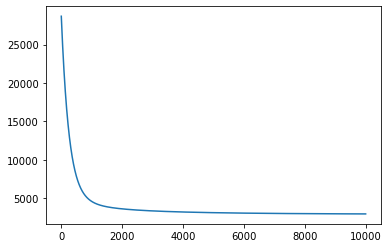

In [15]:
plt.plot(losses)
plt.show()

# 10. test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2867.0806793527777

# 11. 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

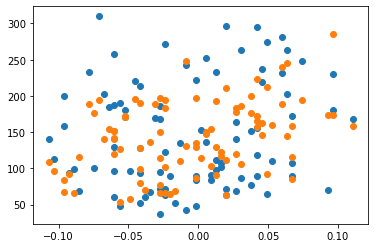

In [17]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

### -------------------------------------------------------------------------------------------

# Project2 : bike

(1) 데이터 가져오기
여기에서 데이터를 다운받습니다.
다운받은 파일의 압축을 해제하고 bike-sharing-demand/train.csv 데이터를 train 변수로 가져옵니다.
(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기
(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
(4) X, y 컬럼 선택 및 train/test 데이터 분리
X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
(5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기
(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기
(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

# 1. 데이터 가져오기 

In [19]:
import pandas as pd

train = pd.read_csv('~/aiffel/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기   
to_datetime 활용 : 링크 참조   
pandas datetime extract year month day 키워드로 검색해 보기   

In [20]:
import datetime

train['datetime']= pd.to_datetime(train['datetime'])

#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

train['year' ] = pd.DatetimeIndex(train['datetime']).year
train['month' ] = pd.DatetimeIndex(train['datetime']).month
train['day' ] = pd.DatetimeIndex(train['datetime']).day
train['hour' ] = pd.DatetimeIndex(train['datetime']).hour
train['minute' ] = pd.DatetimeIndex(train['datetime']).minute
train['second' ] = pd.DatetimeIndex(train['datetime']).second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# 3. year, month, day, hour, minute, second 데이터 개수 시각화하기   
sns.countplot 활용해서 시각화하기   
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

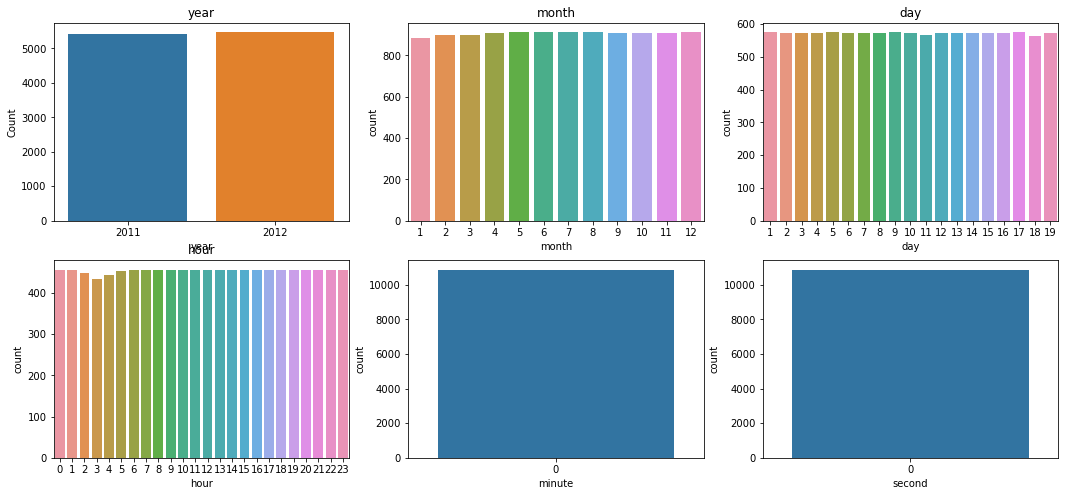

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)


sns.countplot(x='year', data = train, ax=ax1)
sns.countplot(x='month', data = train,  ax=ax2)
sns.countplot(x='day', data = train,   ax=ax3)
sns.countplot(x='hour', data = train ,  ax=ax4)
sns.countplot(x='minute', data = train, ax=ax5)
sns.countplot(x='second', data = train, ax=ax6)

ax1.set(ylabel='Count',title="year")
ax2.set(xlabel='month',title="month")
ax3.set(xlabel='day', title="day")
ax4.set(xlabel='hour', title="hour")
plt.show() 

# 4. X, y 컬럼 선택 및 train/test 데이터 분리   
X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기   
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [64]:
# holiday	workingday	weather	temp	atemp	humidity	windspeed	casual	registered	count	year	month	day	hour	minute	second

X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'casual',
          'humidity', 'windspeed', 'registered', 'year', 'month', 'day', 'hour', 'minute' ,'second']].values
y = train['count'].values


# 5. LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산   
학습된 모델에 X_test를 입력해서 예측값 출력하기   
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기

In [68]:
predictions = model.predict(X_test)
predictions

array([127.,  13., 163., ..., 509.,   5., 239.])

In [69]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

3.197441806131986e-13

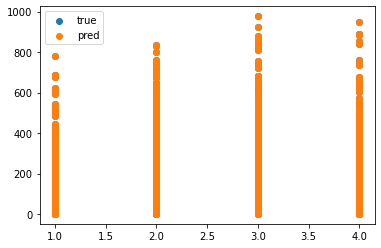

In [70]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

# 7.  x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기   
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기   
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

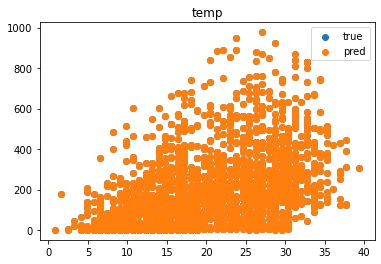

In [71]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.title('temp')
plt.legend()
plt.show()

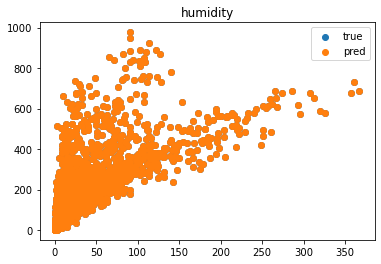

In [72]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.title('humidity')
plt.legend()
plt.show()

# 번외. 상관관계에 따른 변수 제거

X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
          'humidity', 'windspeed', 'registered', 'year', 'month', 'day', 'hour', 'minute' ,'second', 'casual']].values   
y = train['count'].values


In [33]:
np.corrcoef(train['season'], train['count'])

array([[1.        , 0.16343902],
       [0.16343902, 1.        ]])

In [35]:
np.corrcoef(train['holiday'], train['count'])

array([[ 1.        , -0.00539298],
       [-0.00539298,  1.        ]])

In [36]:
np.corrcoef(train['workingday'], train['count'])

array([[1.        , 0.01159387],
       [0.01159387, 1.        ]])

In [37]:
np.corrcoef(train['weather'], train['count'])

array([[ 1.       , -0.1286552],
       [-0.1286552,  1.       ]])

In [38]:
np.corrcoef(train['atemp'], train['count'])

array([[1.        , 0.38978444],
       [0.38978444, 1.        ]])

In [39]:
np.corrcoef(train['humidity'], train['count'])

array([[ 1.        , -0.31737148],
       [-0.31737148,  1.        ]])

In [40]:
np.corrcoef(train['windspeed'], train['count'])

array([[1.        , 0.10136947],
       [0.10136947, 1.        ]])

In [41]:
np.corrcoef(train['registered'], train['count'])

array([[1.        , 0.97094811],
       [0.97094811, 1.        ]])

In [42]:
np.corrcoef(train['year'], train['count'])

array([[1.       , 0.2604033],
       [0.2604033, 1.       ]])

In [43]:
np.corrcoef(train['month'], train['count'])

array([[1.        , 0.16686223],
       [0.16686223, 1.        ]])

In [44]:
np.corrcoef(train['day'], train['count'])

array([[1.        , 0.01982578],
       [0.01982578, 1.        ]])

In [45]:
np.corrcoef(train['temp'], train['count'])

array([[1.        , 0.39445364],
       [0.39445364, 1.        ]])

In [46]:
np.corrcoef(train['hour'], train['count'])

array([[1.        , 0.40060119],
       [0.40060119, 1.        ]])

In [52]:
np.corrcoef(train['minute'], train['count'])

array([[nan, nan],
       [nan,  1.]])

In [50]:
np.corrcoef(train['second'], train['count'])

array([[nan, nan],
       [nan,  1.]])

In [79]:
np.corrcoef(train['casual'], train['count'])

array([[1.        , 0.69041357],
       [0.69041357, 1.        ]])

### register 과 casual의 상관관계가 매우높음을 알 수 있다.
register, casual 을 빼고 진행해 보겠다.

In [102]:
X = train[['temp', 'atemp', 'humidity', 'year', 'hour']].values
y = train['count'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [105]:
model.fit(X_train, y_train)

LinearRegression()

In [106]:
predictions = model.predict(X_test)
predictions

array([261.47442672,  85.46875607, 143.95959523, ..., 268.46946543,
        80.2138806 , 268.422587  ])

In [107]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

143.16722515697808

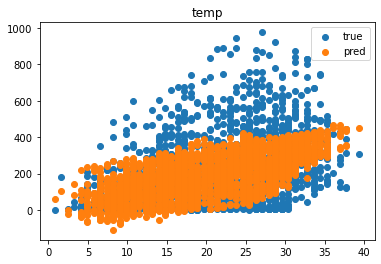

In [108]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.title('temp')
plt.legend()

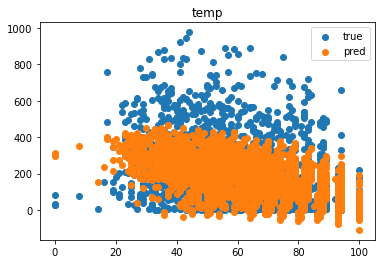

In [109]:
plt.scatter(X_test[:, 2], y_test, label="true")
plt.scatter(X_test[:, 2], predictions, label="pred")
plt.title('temp')
plt.legend()

 요소 registered, casual의 합이 count 여서 그런지 rmse 값이 너무 작았다.    
 위의 두 요소를 빼니 rmse 143.16으로 150보다 작게 조절할 수 있었다.   
 - minute, second 요소의 값들이 다 0이므로 아무 상관관계가 없는 요소였다.